In [1]:
# cv2 remap method document link
## http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#void remap(InputArray src, OutputArray dst, InputArray map1, InputArray map2, int interpolation, int borderMode, const Scalar& borderValue)

# facial landmark point info link
## http://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/

# 각 interpolate 별 성능비교
# https://stackoverflow.com/questions/37872171/how-can-i-perform-two-dimensional-interpolation-using-scipy

# interpolate + remap 활용 예제(key)
## https://stackoverflow.com/questions/10364201/image-transformation-in-opencv

In [5]:
from __future__ import print_function, division
import cv2
import os
from skimage import io, transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.ion() # interactive mode

In [6]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2) # (68, 2)

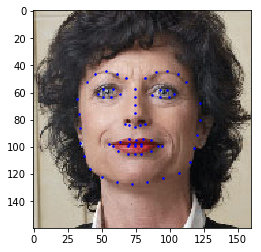

In [10]:
# landmarks 찍는 방법

def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='b')
#     plt.scatter(landmarks[:, 0][27:31], landmarks[:, 1][27:31], s=10, marker='.', c='b')
    plt.pause(0.001)

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)), landmarks)
plt.show()

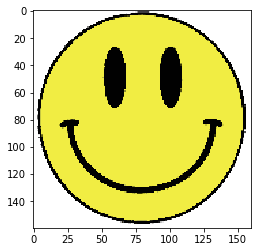

In [7]:
# cf) image resize 및 alpha 값 없애기 방법

smile_img = io.imread('smile.jpg') # (2360, 2400, 4)
resized_remove_alpha_smile_img = cv2.resize(smile_img, (160, 160))[:,:,:3] 
plt.imshow(resized_remove_alpha_smile_img)

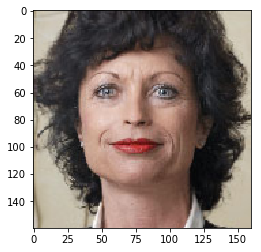

In [37]:
### 답 코드

image = io.imread(os.path.join('faces/', img_name))

# sample transform landmarks
new_landmarks = np.copy(landmarks)
# new_landmarks[:, 0][27:31] += 5
new_landmarks[:, 1][27:31] += 5

grid_y, grid_x = np.mgrid[0:159:160j, 0:159:160j]

landmarks_with_zero_displacement = np.append(landmarks, [[0,0], [0, 80], [0, 159], [80, 0], [159,0], [159, 80], [159, 159], [80, 159]], axis=0)
new_landmarks_with_zero_displacement = np.append(new_landmarks, [[0,0], [0, 80], [0, 159], [80, 0], [159,0], [159, 80], [159, 159], [80, 159]], axis=0)

rbf_x = Rbf(new_landmarks_with_zero_displacement[:, 0], new_landmarks_with_zero_displacement[:, 1], landmarks_with_zero_displacement[:, 0], epsilon=2, function='linear', smooth=1)
ZI_x = rbf_x(grid_x, grid_y)

rbf_y = Rbf(new_landmarks_with_zero_displacement[:, 0], new_landmarks_with_zero_displacement[:, 1], landmarks_with_zero_displacement[:, 1], epsilon=2, function='linear', smooth=1)
ZI_y = rbf_y(grid_x, grid_y)

map_x = np.append([], [ar for ar in ZI_x]).reshape(160, 160).astype('float32')
map_y = np.append([], [ar for ar in ZI_y]).reshape(160, 160).astype('float32')
warped = cv2.remap(image, map_x, map_y, cv2.INTER_LINEAR)
plt.imshow(warped)

# plt.scatter(new_landmarks[:, 0][27:31], new_landmarks[:, 1][27:31], s=10, marker='.', c='b')
# plt.pause(0.001)